In [1]:
#importing necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.pandas.set_option("display.max_columns",None)

In [2]:
#reading the csv file into  a var name data
data=pd.read_csv(r'D:\Internship\1 Assignment\BankChurners.csv')

In [3]:
data.shape

(10127, 23)

In [4]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [5]:
#Since our target variable is attrition flag lets do some preprocessing since our target variable is categorical 
#data_output=pd.get_dummies(data["Attrition_Flag"],drop_first=True)
y=pd.get_dummies(data["Attrition_Flag"],drop_first=True)
#y=data_output
y.head()


,Existing Customer
0,1
1,1
2,1
3,1
4,1


In [6]:
#there are many columns which are not use full for us so selecting with in the range 
data_input=data.iloc[:,2:21]
print(data_input.shape) 
data_input.head()

(10127, 19)


,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [7]:
# checking the list of numerical variables in the selected columns 
numerical_feature=[feature for feature in data_input.columns if data_input[feature].dtypes!='O']
print("number of numerical variables",len(numerical_feature))
data_input[numerical_feature].head()

number of numerical variables 14


,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [8]:
#now checking w.r.t discrete columns 
discrete_feature=[feature for feature in numerical_feature if len(data_input[feature].unique())<25 and feature not in ['id']]
print("The number of Discrete Features are :{}".format(len(discrete_feature)))

The number of Discrete Features are :4


In [9]:
discrete_feature

['Dependent_count',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon']

In [10]:
data_input[discrete_feature].head()

,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon
0,3,5,1,3
1,5,6,1,2
2,3,4,1,0
3,4,3,4,1
4,3,5,1,0


In [11]:
# exploring continous features
continous_feature=[feature for feature in numerical_feature if len(data_input[feature].unique())>25 and feature not in ['id']]
print("The number of continous Features are :{}".format(len(continous_feature)))

The number of continous Features are :10


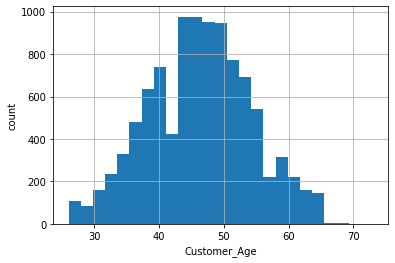

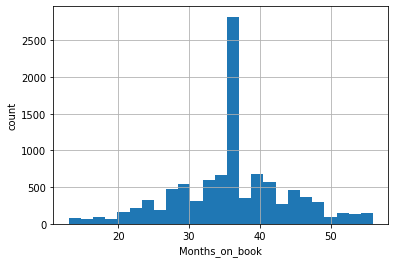

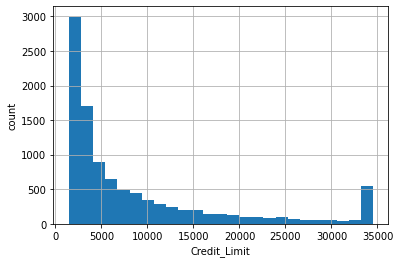

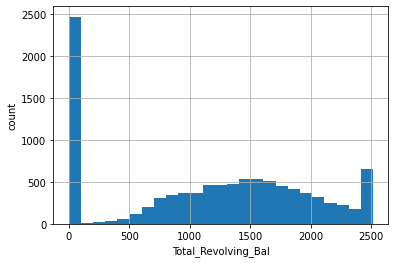

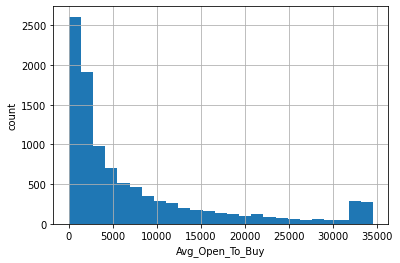

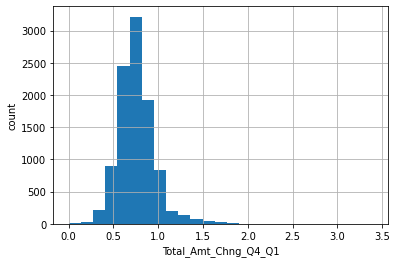

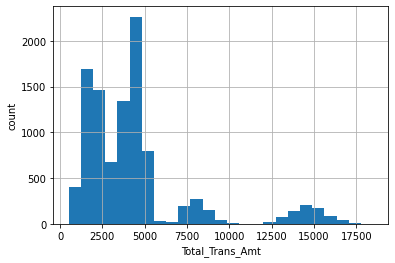

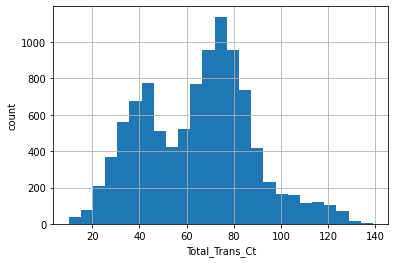

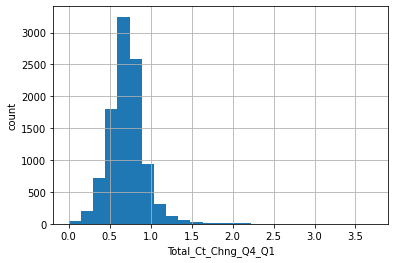

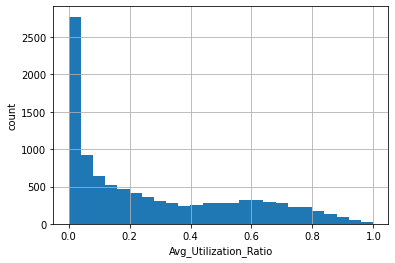

In [12]:
#performing vizual analysis
for feature in continous_feature:
    df=data.copy()
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.show()

# we can see that the data is skewed w.r.t few features while few of them have a gaussian distribuition but since our use case isnt with respect to linear regression we need not do the log transformation 

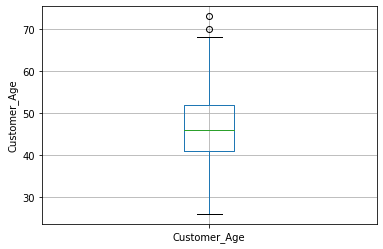

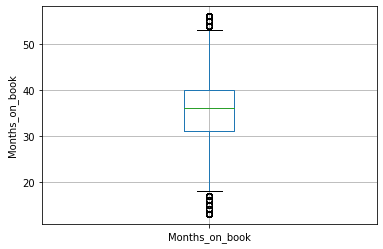

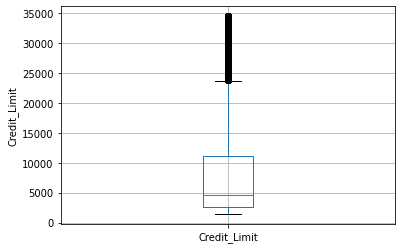

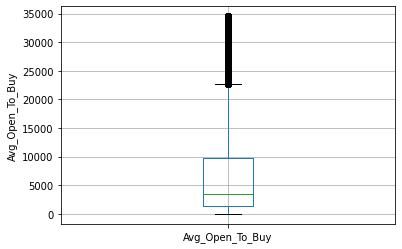

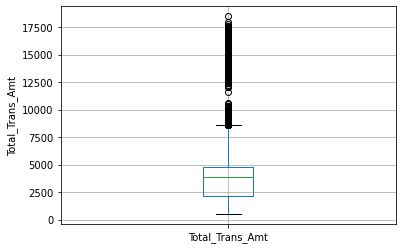

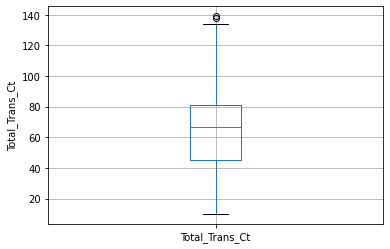

In [13]:
for feature in continous_feature:
    df=data.copy()
    if 0 in df[feature].unique():
        pass
    else:
        df.boxplot(column=feature)
        plt.ylabel(feature)
        plt.show()
         

c:\users\ahmad\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


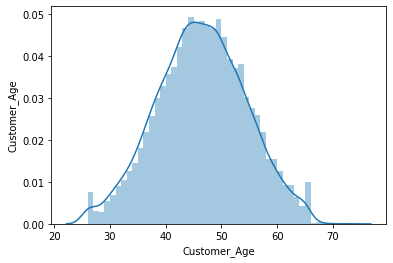

c:\users\ahmad\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


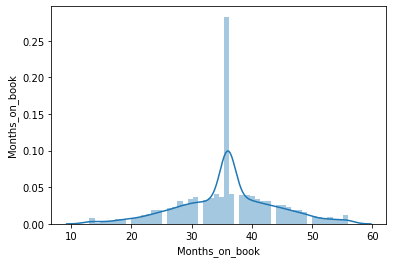

c:\users\ahmad\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


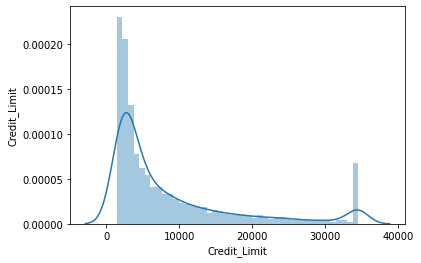

c:\users\ahmad\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


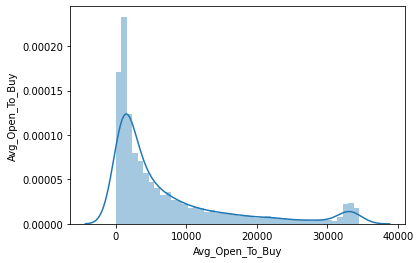

c:\users\ahmad\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


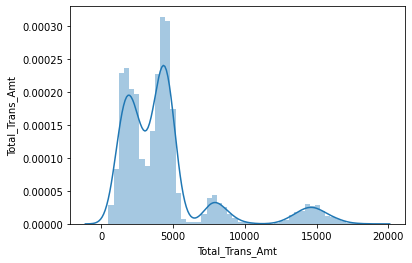

c:\users\ahmad\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


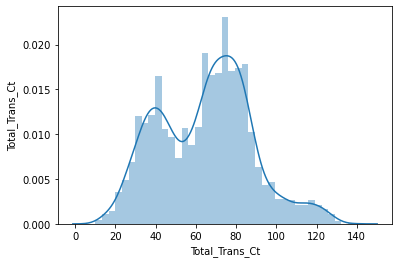

In [14]:
for feature in continous_feature:
    df=data.copy()
    if 0 in df[feature].unique():
        pass
    else:
        sns.distplot(df[feature])
        plt.ylabel(feature)
        plt.show()

In [15]:
data['Customer_Age'].describe()

count    10127.000000
mean        46.325960
std          8.016814
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: Customer_Age, dtype: float64

In [16]:
#age follows a gaussian distribuition so lets calculate the boundaries which differentiate the outliers
upper_bound=data["Avg_Open_To_Buy"].mean()+3*data["Avg_Open_To_Buy"].std()
lower_bound=data["Avg_Open_To_Buy"].mean()-3*data["Avg_Open_To_Buy"].std()
print(upper_bound,lower_bound)

34741.1956076523 -19802.91633442232


In [17]:
data_input.loc[data_input["Customer_Age"]>70,'Customer_Age']=70

In [18]:
IQR=df.Credit_Limit.quantile(0.75)-df.Credit_Limit.quantile(0.25)
lower_wishker=df.Credit_Limit.quantile(0.25)-(IQR*3)
upper_wishker=df.Credit_Limit.quantile(0.75)+(IQR*3)
print(lower_wishker,upper_wishker)

-22982.5 36605.0


In [19]:
categorical_features=[feature for feature in data_input if data_input[feature].dtype=='O']
print("the number of categorical features are: {}".format(len(categorical_features)))

the number of categorical features are: 5


In [20]:
for feature in categorical_features:
    print("the feature is {} and number of categories are {}".format(feature,len(data_input[feature].unique())))

the feature is Gender and number of categories are 2
the feature is Education_Level and number of categories are 7
the feature is Marital_Status and number of categories are 4
the feature is Income_Category and number of categories are 6
the feature is Card_Category and number of categories are 4


# performing encoding based on nominal or ordinal variable 

In [21]:
df['Card_Category'].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [22]:
df.Card_Category.value_counts().sort_values(ascending=False)

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [23]:
card_map={'Blue':0,
               'Silver':1,
               'Gold':2,
               'Platinum':3
               }

data_input['CreditCard_ordinal']=data_input.Card_Category.map(card_map)
data_input.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,CreditCard_ordinal
0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
3,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0


In [24]:
df['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [25]:
df.Income_Category.value_counts().sort_values(ascending=False)

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [26]:
x=df.groupby(['Income_Category','Attrition_Flag']).count()
x

#x.first()

CLIENTNUM  Customer_Age  Gender  \
Income_Category Attrition_Flag                                       
$120K +         Attrited Customer        126           126     126   
                Existing Customer        601           601     601   
$40K - $60K     Attrited Customer        271           271     271   
                Existing Customer       1519          1519    1519   
$60K - $80K     Attrited Customer        189           189     189   
                Existing Customer       1213          1213    1213   
$80K - $120K    Attrited Customer        242           242     242   
                Existing Customer       1293          1293    1293   
Less than $40K  Attrited Customer        612           612     612   
                Existing Customer       2949          2949    2949   
Unknown         Attrited Customer        187           187     187   
                Existing Customer        925           925     925   

                                   Dependent_count  Education_Level  \
Income_Category Attrition_Flag                                        
$120K +         Attrited Customer              126              126   
                Existing Customer              601              601   
$40K - $60K     Attrited Customer              271              271   
                Existing Customer             1519             1519   
$60K - $80K     Attrited Customer              189              189   
                Existing Customer             1213             1213   
$80K - $120K    Attrited Customer              242              242   
                Existing Customer             1293             1293   
Less than $40K  Attrited Customer              612              612   
                Existing Customer             2949             2949   
Unknown         Attrited Customer              187              187   
                Existing Customer              925              925   

                                   Marital_Status  Card_Category  \
Income_Category Attrition_Flag                                     
$120K +         Attrited Customer             126            126   
                Existing Customer             601            601   
$40K - $60K     Attrited Customer             271            271   
                Existing Customer            1519           1519   
$60K - $80K     Attrited Customer             189            189   
                Existing Customer            1213           1213   
$80K - $120K    Attrited Customer             242            242   
                Existing Customer            1293           1293   
Less than $40K  Attrited Customer             612            612   
                Existing Customer            2949           2949   
Unknown         Attrited Customer             187            187   
                Existing Customer             925            925   

                                   Months_on_book  Total_Relationship_Count  \
Income_Category Attrition_Flag                                                
$120K +         Attrited Customer             126                       126   
                Existing Customer             601                       601   
$40K - $60K     Attrited Customer             271                       271   
                Existing Customer            1519                      1519   
$60K - $80K     Attrited Customer             189                       189   
                Existing Customer            1213                      1213   
$80K - $120K    Attrited Customer             242                       242   
                Existing Customer            1293                      1293   
Less than $40K  Attrited Customer             612                       612   
                Existing Customer            2949                      2949   
Unknown         Attrited Customer             187                       187   
                Existing Customer             925                       925   


In [27]:
income_map={'Less than $40K':0,
               'Unknown':1,
               '$40K - $60K':2,
               '$60K - $80K':3,
               '$80K - $120K':4,
              '$120K +':5
               }
data_input['income_ordinal']=data_input.Income_Category.map(income_map)
data_input.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,CreditCard_ordinal,income_ordinal
0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,3
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,0
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,4
3,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,0
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,3


In [28]:
df["Education_Level"].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [29]:
df.Education_Level.value_counts().sort_values(ascending=False)

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [30]:
#z=df.groupby(['Education_Level','Card_Category']).count()
z=df.groupby(['Education_Level','Attrition_Flag']).count()
z

CLIENTNUM  Customer_Age  Gender  \
Education_Level Attrition_Flag                                       
College         Attrited Customer        154           154     154   
                Existing Customer        859           859     859   
Doctorate       Attrited Customer         95            95      95   
                Existing Customer        356           356     356   
Graduate        Attrited Customer        487           487     487   
                Existing Customer       2641          2641    2641   
High School     Attrited Customer        306           306     306   
                Existing Customer       1707          1707    1707   
Post-Graduate   Attrited Customer         92            92      92   
                Existing Customer        424           424     424   
Uneducated      Attrited Customer        237           237     237   
                Existing Customer       1250          1250    1250   
Unknown         Attrited Customer        256           256     256   
                Existing Customer       1263          1263    1263   

                                   Dependent_count  Marital_Status  \
Education_Level Attrition_Flag                                       
College         Attrited Customer              154             154   
                Existing Customer              859             859   
Doctorate       Attrited Customer               95              95   
                Existing Customer              356             356   
Graduate        Attrited Customer              487             487   
                Existing Customer             2641            2641   
High School     Attrited Customer              306             306   
                Existing Customer             1707            1707   
Post-Graduate   Attrited Customer               92              92   
                Existing Customer              424             424   
Uneducated      Attrited Customer              237             237   
                Existing Customer             1250            1250   
Unknown         Attrited Customer              256             256   
                Existing Customer             1263            1263   

                                   Income_Category  Card_Category  \
Education_Level Attrition_Flag                                      
College         Attrited Customer              154            154   
                Existing Customer              859            859   
Doctorate       Attrited Customer               95             95   
                Existing Customer              356            356   
Graduate        Attrited Customer              487            487   
                Existing Customer             2641           2641   
High School     Attrited Customer              306            306   
                Existing Customer             1707           1707   
Post-Graduate   Attrited Customer               92             92   
                Existing Customer              424            424   
Uneducated      Attrited Customer              237            237   
                Existing Customer             1250           1250   
Unknown         Attrited Customer              256            256   
                Existing Customer             1263           1263   

                                   Months_on_book  Total_Relationship_Count  \
Education_Level Attrition_Flag                                                
College         Attrited Customer             154                       154   
                Existing Customer             859                       859   
Doctorate       Attrited Customer              95                        95   
                Existing Customer             356                       356   
Graduate        Attrited Customer             487                       487   
                Existing Customer            2641                      2641   
High School     Attrited Customer             306       

In [31]:
education_map={'Uneducated':0,
               'Unknown':1,
               'High School':2,
               'College':3,
               'Graduate':4,
              'Post-Graduate':5,
              'Doctorate':6 }

data_input['education_ordinal']=data_input.Education_Level.map(education_map)
data_input.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,CreditCard_ordinal,income_ordinal,education_ordinal
0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,3,2
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,0,4
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,4,4
3,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,0,2
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,3,0


In [32]:
data_input=data_input.drop(['Card_Category','Income_Category','Education_Level'],axis=1)

In [33]:
data_input.head()

,Customer_Age,Gender,Dependent_count,Marital_Status,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,CreditCard_ordinal,income_ordinal,education_ordinal
0,45,M,3,Married,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,3,2
1,49,F,5,Single,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,0,4
2,51,M,3,Married,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,4,4
3,40,F,4,Unknown,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,0,2
4,40,M,3,Married,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,3,0


# Gender 1=Male ,0=Female

In [34]:
data_input=pd.get_dummies(data_input,columns=['Gender','Marital_Status'],drop_first=True)

In [35]:
data_input.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,CreditCard_ordinal,income_ordinal,education_ordinal,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,3,2,1,1,0,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,0,4,0,0,1,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,4,4,1,1,0,0
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,0,2,0,0,0,1
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,3,0,1,1,0,0


# performing extra vizualization for checking corelation to avoid multicollinearity problem 

In [37]:
import dtale

In [38]:
dtale.show(data_input)

c:\users\ahmad\appdata\local\programs\python\python39\lib\site-packages\dtale\utils.py:502: FutureWarning:

Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.



In [39]:
data_in=data_input.drop(['Avg_Open_To_Buy','Total_Trans_Ct'],axis=1)
data_in.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,CreditCard_ordinal,income_ordinal,education_ordinal,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,45,3,39,5,1,3,12691.0,777,1.335,1144,1.625,0.061,0,3,2,1,1,0,0
1,49,5,44,6,1,2,8256.0,864,1.541,1291,3.714,0.105,0,0,4,0,0,1,0
2,51,3,36,4,1,0,3418.0,0,2.594,1887,2.333,0.000,0,4,4,1,1,0,0
3,40,4,34,3,4,1,3313.0,2517,1.405,1171,2.333,0.760,0,0,2,0,0,0,1
4,40,3,21,5,1,0,4716.0,0,2.175,816,2.500,0.000,0,3,0,1,1,0,0


In [40]:
y.value_counts()

Existing Customer
1                    8500
0                    1627
dtype: int64

In [41]:
out=y
out.values.ravel()

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

In [42]:
data_in.isnull().values.any(),y.isnull().values.any()

(False, False)

In [43]:
data_in.shape,y.shape

((10127, 19), (10127, 1))

In [44]:
data_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10127 non-null  int64  
 1   Dependent_count           10127 non-null  int64  
 2   Months_on_book            10127 non-null  int64  
 3   Total_Relationship_Count  10127 non-null  int64  
 4   Months_Inactive_12_mon    10127 non-null  int64  
 5   Contacts_Count_12_mon     10127 non-null  int64  
 6   Credit_Limit              10127 non-null  float64
 7   Total_Revolving_Bal       10127 non-null  int64  
 8   Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 9   Total_Trans_Amt           10127 non-null  int64  
 10  Total_Ct_Chng_Q4_Q1       10127 non-null  float64
 11  Avg_Utilization_Ratio     10127 non-null  float64
 12  CreditCard_ordinal        10127 non-null  int64  
 13  income_ordinal            10127 non-null  int64  
 14  educat

# We can Obsereve there is a data imbalance which will lead to bias in output if we continue our exploration without fixing it hence lets fix it by doing over sampling since if we do undersampling we will lose data and we can even use smotetomk sampling method but im using random sampling 

In [45]:
!pip install imblearn

In [46]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(sampling_strategy=0.8)


In [47]:
X_train,Y_train=os.fit_resample(data_in,y)

In [48]:
Y_train.value_counts()

Existing Customer
1                    8500
0                    6800
dtype: int64

In [49]:
from sklearn import preprocessing
scalar=preprocessing.StandardScaler().fit(X_train)

In [50]:
x_train_s=scalar.transform(X_train)

In [51]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(x_train_s,Y_train)
mutual_info

c:\users\ahmad\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



array([0.00886569, 0.00614985, 0.01224949, 0.01705889, 0.04236623,
       0.04490496, 0.26941003, 0.26669749, 0.12993957, 0.413478  ,
       0.21319348, 0.17810996, 0.        , 0.00277344, 0.00513934,
       0.        , 0.00590304, 0.00263561, 0.        ])

In [52]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=X_train.columns
mutual_info.sort_values(ascending=False)

Total_Trans_Amt             0.413478
Credit_Limit                0.269410
Total_Revolving_Bal         0.266697
Total_Ct_Chng_Q4_Q1         0.213193
Avg_Utilization_Ratio       0.178110
Total_Amt_Chng_Q4_Q1        0.129940
Contacts_Count_12_mon       0.044905
Months_Inactive_12_mon      0.042366
Total_Relationship_Count    0.017059
Months_on_book              0.012249
Customer_Age                0.008866
Dependent_count             0.006150
Marital_Status_Married      0.005903
education_ordinal           0.005139
income_ordinal              0.002773
Marital_Status_Single       0.002636
CreditCard_ordinal          0.000000
Gender_M                    0.000000
Marital_Status_Unknown      0.000000
dtype: float64

<AxesSubplot:>

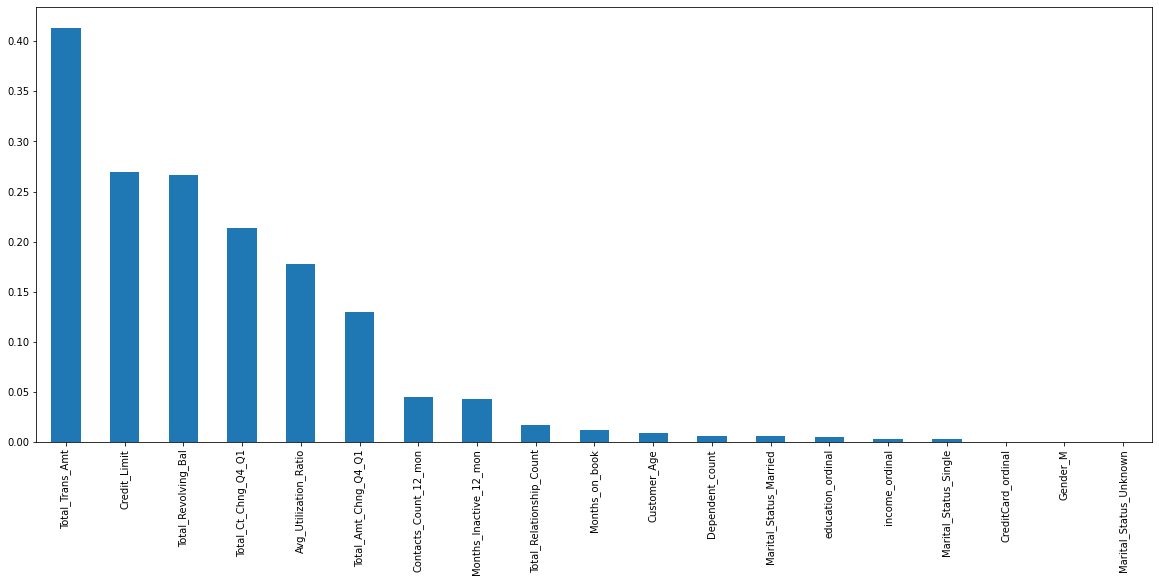

In [53]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_train[["Total_Trans_Amt","Credit_Limit","Total_Revolving_Bal",
                                                        "Total_Ct_Chng_Q4_Q1","Avg_Utilization_Ratio","Total_Amt_Chng_Q4_Q1"]]
                                                        ,Y_train,test_size=0.2,random_state=12)

In [55]:
from sklearn import preprocessing
scalar=preprocessing.StandardScaler().fit(x_train)

In [56]:
x_train_s=scalar.transform(x_train)

In [57]:
x_test_s=scalar.transform(x_test)

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [59]:
clf_lrs=LogisticRegression()
clf_lrs.fit(x_train_s,y_train.values.ravel())

LogisticRegression()

In [60]:
predict=clf_lrs.predict(x_test_s)

In [61]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test,predict))


0.7277777777777777


In [62]:
from sklearn import tree
clf=tree.DecisionTreeClassifier(min_samples_leaf=15,max_depth=3)
clf.fit(x_train_s,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=15)

In [63]:
y_tep=clf.predict(x_test_s)

In [64]:
confusion_matrix(y_test,y_tep)

array([[1240,  139],
       [ 399, 1282]], dtype=int64)

In [65]:
accuracy_score(y_test,y_tep)

0.8241830065359477

[Text(167.4, 190.26, 'X[0] <= -0.332\ngini = 0.493\nsamples = 12240\nvalue = [5421, 6819]'),
 Text(83.7, 135.9, 'X[2] <= -0.366\ngini = 0.439\nsamples = 6311\nvalue = [4260, 2051]'),
 Text(41.85, 81.53999999999999, 'X[3] <= 0.836\ngini = 0.185\nsamples = 3158\nvalue = [2832, 326]'),
 Text(20.925, 27.180000000000007, 'gini = 0.153\nsamples = 2971\nvalue = [2723, 248]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.486\nsamples = 187\nvalue = [109, 78]'),
 Text(125.55000000000001, 81.53999999999999, 'X[3] <= -0.124\ngini = 0.496\nsamples = 3153\nvalue = [1428, 1725]'),
 Text(104.625, 27.180000000000007, 'gini = 0.477\nsamples = 1780\nvalue = [1082, 698]'),
 Text(146.475, 27.180000000000007, 'gini = 0.377\nsamples = 1373\nvalue = [346, 1027]'),
 Text(251.10000000000002, 135.9, 'X[0] <= 0.444\ngini = 0.315\nsamples = 5929\nvalue = [1161, 4768]'),
 Text(209.25, 81.53999999999999, 'X[3] <= -0.712\ngini = 0.147\nsamples = 4052\nvalue = [324, 3728]'),
 Text(188.32500000000002, 27.18

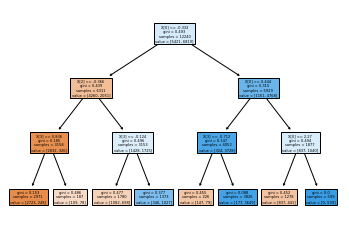

Executing shutdown due to inactivity...


2021-07-14 18:47:59,149 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2021-07-14 18:48:03,218 - INFO     - Executing shutdown...
c:\users\ahmad\appdata\local\programs\python\python39\lib\site-packages\dtale\app.py:397: UserWarning:

The 'environ['werkzeug.server.shutdown']' function is deprecated and will be removed in Werkzeug 2.1.



In [67]:
from sklearn.tree import plot_tree
plot_tree(clf,filled=True)